In [1]:
"""
Script to analyze data about space missions since 1957 including:
- Create a pie plot that shows the distribution of mission outcomes.

- Create a horizontal bar plot showing the total number of missions for each company, with the most at the top and the fewest at the bottom.

- Create the same horizontal bar plot, but with the missions grouped into success and failure, with success in green and failure in red. 
"""

# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read csv data
missions_df = pd.read_csv("data.csv")
missions_df

,Company,Location,DateTime,Details,Outcome
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,Success
...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,Success


In [2]:
"""
Script to analyze data about space missions since 1957 including:
- Create a pie plot that shows the distribution of mission outcomes.

- Create a horizontal bar plot showing the total number of missions for each company, with the most at the top and the fewest at the bottom.

- Create the same horizontal bar plot, but with the missions grouped into success and failure, with success in green and failure in red. 
"""

# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read csv data
missions_df = pd.read_csv("data.csv")

# Function for Q1: Create a pie plot that shows the distribution of mission outcomes.
def pie_plot_mission_outcomes():
    """
    Function to create a pie plot that shows the distribution of mission outcomes.
    """
    
    outcomes = missions_df.groupby('Outcome').size().sort_values(ascending=False)

    #print(outcomes)
    
    outcomes.plot(kind='pie',
                 ylabel = "Outcome")

    plt.title('Plot 1', x=0, y=1)
    plt.savefig('mission_pie_plot.png')


# Function for Q2: horizontal bar plot showing the total number of missions for each company
def bar_plot_mission_numbers():
    """
    Function to create a horizontal bar plot that showing the total number of missions for each company, 
    with the most at the top and the fewest at the bottom.
    """
    
    num_missions = missions_df.groupby('Company').size().sort_values()
    #num_missions = num_missions[-5:]
    
    plt.figure(figsize=(8,8))
    plt.title('Plot 2', x=0,y=1)
    plt.barh(num_missions.index, num_missions.values)
    plt.ylabel('Company')
    
    plt.tight_layout()
    plt.savefig('mission_bar_plot.png')
    





# 1. Run function to generate pie plot of the mission outcomes  
#pie_plot_mission_outcomes()

# 2. Run function to generate bar plot of missions run by company   
#bar_plot_mission_numbers()




In [3]:
def build_mission_successes_df():
    
    mission_summary = missions_df.groupby(['Company', 'Outcome']).size().sort_values().reset_index()

    success_df = mission_summary[mission_summary['Outcome'] == 'Success']

    failure_df = mission_summary[mission_summary['Outcome'] != 'Success']
    failure_df = failure_df.groupby('Company')[0].sum().reset_index()

    total_df =  missions_df.groupby(['Company']).size().sort_values().reset_index()
    total_df.rename(columns= {0:'Total Missions'}, inplace=True)

    total_df = pd.merge(total_df, success_df[['Company',0]], how='left', left_on='Company', right_on='Company')
    total_df.rename(columns= {0:'Successes'}, inplace=True)
    total_df = pd.merge(total_df, failure_df[['Company',0]], how='left', left_on='Company', right_on='Company')
    total_df.rename(columns= {0:'Failures'}, inplace=True)

    total_df = total_df.fillna(0)
    
    return total_df

# Function for Q3: horizontal bar plot showing the total number of missions for each company
# color coded for success and failure
def bar_plot_missions_color_coded():
    
    """
    Function to create a horizontal bar plot that showing the total number of missions for each company, 
    with the most at the top and the fewest at the bottom.
    Have the missions grouped into success and failure, with success in green and failure in red. 
    """
    
    plt.figure(figsize=(8,8))
    plt.title('Plot 3', x=0,y=1)
    
    plt.barh(total_df['Company'], total_df['Failures'], color='red')
    plt.barh(total_df['Company'], total_df['Successes'], color ='green')
    
    
    plt.ylabel('Company')
    
    total_df[[]]
    
    plt.tight_layout()
    #plt.savefig('mission_bar_plot_color_coded.png')
    

# Using .plot() instead of plt

In [4]:
# Build the df to use for the plotting
total_df = build_mission_successes_df()

Text(0, 1, 'Plot 3')

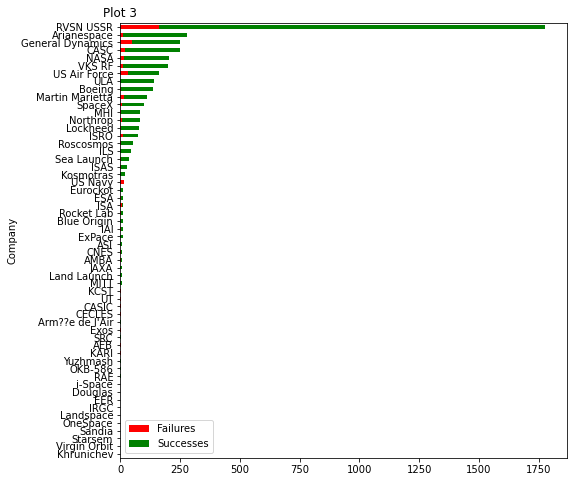

In [5]:
df = total_df.set_index('Company',drop=True)
df = df.sort_values('Total Missions')
df = df.drop(columns = ['Total Missions'])
df = df[['Failures', 'Successes']]

df.plot(kind='barh',
        color = ['red', 'green'],
        figsize = [8,8],
        xlabel = 'Company',
        #title = 'Plot 3',
        stacked= True
       )

plt.title('Plot 3', x=0, y=1)
#plt.title('Plot 3', 'left')


# Trying to combine Them

<Figure size 576x576 with 0 Axes>

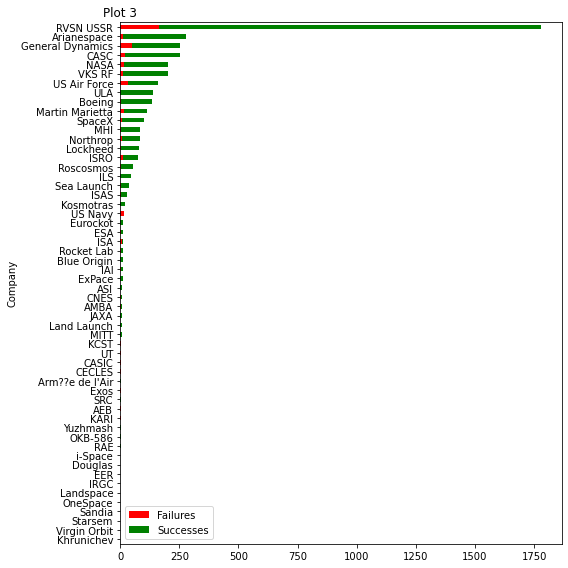

In [6]:
outcomes = missions_df.groupby('Outcome').size().sort_values(ascending=False)

############ One ###########
outcomes.plot(kind='pie',
             ylabel = "Outcome")

plt.title('Plot 1', x=0, y=1)
plt.savefig('mission_pie_plot.png')

plt.clf()

############## Two #################
num_missions = missions_df.groupby('Company').size().sort_values()

num_missions.plot(kind='barh',
        figsize = [8,8],
        xlabel = 'Company',
        #title = 'Plot 3',
       )

plt.title('Plot 2', x=0, y=1)
plt.tight_layout()
plt.savefig('mission_bar_plot.png')

plt.clf()

############## Three ##################
df.plot(kind='barh',
        color = ['red', 'green'],
        figsize = [8,8],
        xlabel = 'Company',
        #title = 'Plot 3',
        stacked= True
       )

plt.title('Plot 3', x=0, y=1)
plt.tight_layout()
plt.savefig('mission_bar_plot_color_coded.png')
